# 平移变换

## 加载图像

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

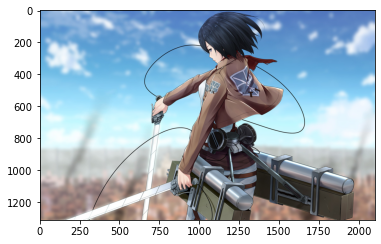

In [22]:
img = cv.imread(r'./images/target.jpg')
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

## 加载平移矩阵

In [23]:
matrix = np.float32([[1, 0, 100], [0, 1, 50]])


In [24]:
target_img = cv.warpAffine(img, matrix, (img.shape[1], img.shape[0]))

## 结果

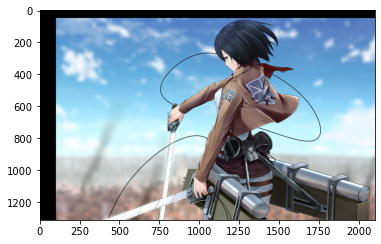

In [25]:
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()

# 旋转

## 获取旋转矩阵

In [26]:
# 第一个参数为旋转中心 第二个为旋转角度 第三个为旋转后的缩放因子
m = cv.getRotationMatrix2D((img.shape[1] / 2,img.shape[0] / 2),45,0.6)

## 显示结果

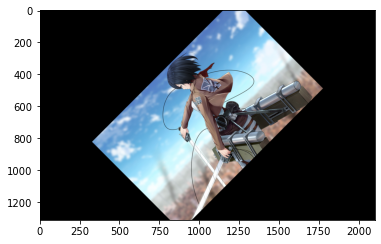

In [27]:
target_img = cv.warpAffine(img, m, (img.shape[1], img.shape[0]))
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()

# 仿射变换

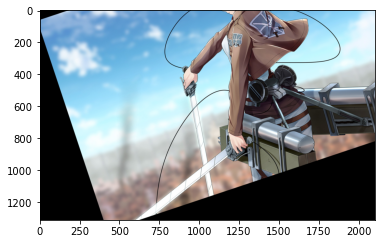

In [29]:
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[50,100],[200,50],[100,250]])

M=cv.getAffineTransform(pts1,pts2)
rows, cols, _ = img.shape


# dst=cv.warpAffine(img,M,(cols//2,rows//2))
dst=cv.warpAffine(img,M,(cols,rows))


dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()

# 透视变换

In [85]:
out_point = np.float32([[600, 0], [0, 300], [900, 300], [1300, 900]])

In [109]:
mat = cv.getPerspectiveTransform(np.float32([[0, 0], [rows, 0], [0, cols], [rows, cols]]), out_point)

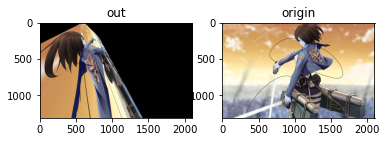

In [111]:
out = cv.warpPerspective(img, mat, (cols, rows))
plt.subplot(121),plt.imshow(out), plt.title('out')
plt.subplot(122), plt.imshow(img), plt.title('origin')
plt.show()

# 测试

In [158]:
img = cv.imread('./images/origin.png')
target = cv.imread('./images/target.png')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
target = cv.cvtColor(target, cv.COLOR_BGR2RGB)

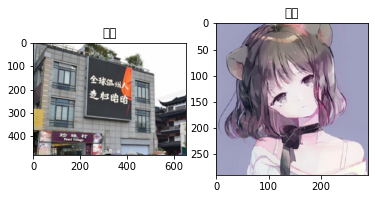

In [159]:
plt.subplot(1, 2, 1)
plt.title('原图')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('目标')
plt.imshow(target)
plt.show()

In [160]:
print(f'原图尺寸{img.shape}')
print(f'目标尺寸{target.shape}')

原图尺寸(482, 651, 3)
目标尺寸(290, 291, 3)


In [161]:
mat1 = np.float32([[236, 71], [227,  312], [419, 332], [417, 113]])
mat2 = np.float32([[0, 0], [0, 290], [290, 291], [291, 0]])

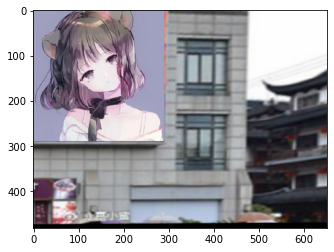

In [162]:
out_mat = cv.getPerspectiveTransform(mat2, mat1)
out_mat2 = cv.getPerspectiveTransform(mat1, mat2)


out_img = cv.warpPerspective(img, out_mat2, (651, 482))

out_img[:290, :291] = target


plt.imshow(out_img)
plt.show()

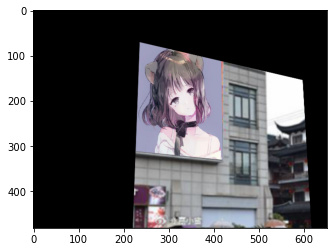

In [163]:
out_img = cv.warpPerspective(out_img, out_mat, (651, 482))
plt.imshow(out_img)
plt.show()

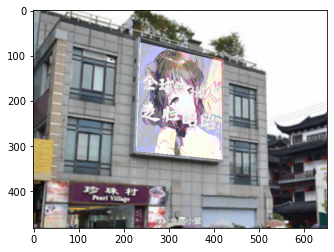

In [164]:
out_img2 = out_img

for i in range(3):
    out_img2[:, :, i] = cv.bitwise_or(out_img[:, :, i], img[:, :, i])
plt.imshow(out_img2)
plt.show()

## 关于图片上的文字后期再处理，现在下一步